# PROBLEM STATEMENT

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 

# STEP #1:  IMPORT THE LIBRARIES


In [ ]:
#Pandas allows importing data of various file format like csv and also helps with Dataframe
#NumPy package is used to perform different operations, it is a general-purpose array-processing package
#Matplotlib.pyplot is a collection of command style functions which makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure
#Seaborn is used to create more attractive and informative statistical graphics.
#%matplotlib inline is basically used to show an image automatically within the browser without using show().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# STEP #2: IMPORT DATASET

Dataset taken from https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4#yelp_review.csv

In [ ]:
#import the csv file of dataset

In [2]:
yelpDB = pd.read_csv("yelp_review.csv")

In [ ]:
#.info() shows the data types of the data columns in the dataset

In [3]:
yelpDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [ ]:
#since our dataset is massive, we take .001 fraction of it for better processing

In [4]:
yelpDB= yelpDB.sample(frac=.001)

In [8]:
yelpDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 5098368 to 882008
Data columns (total 9 columns):
review_id      5262 non-null object
user_id        5262 non-null object
business_id    5262 non-null object
stars          5262 non-null int64
date           5262 non-null object
text           5262 non-null object
useful         5262 non-null int64
funny          5262 non-null int64
cool           5262 non-null int64
dtypes: int64(4), object(5)
memory usage: 411.1+ KB


In [ ]:
#head() shows the first five rows of the yelp dataset

In [5]:
yelpDB.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
5098368,4koG5Ed-lYi8L2LvLz9LZg,XYZw8rWQ0wjMWQChRCU8Hg,KYasaF1nov1bn7phfSgWeg,5,2016-02-17,This spot is a place I crave so much I will dr...,0,0,0
1505288,8N1m8it4lUnFcTG_8bI-5w,3I-DgYtwVzAkXTFlp4X6rg,qdtfcYMROGZVvYcE9F23yg,3,2010-09-26,What?! Outta red beef tamales? Bogus.\n\nMy fi...,0,0,0
2545798,fCSI2vRwV8kJ2V-35ZiRLQ,KuxEQBHWSihMYNbIv6DFXw,GvgkfoTqL3Xra3eLkUAw5g,5,2015-07-13,Dr. Scholes and his team are amazing! So glad ...,2,0,0
3074053,FsyQRuEt-Y8BMKbYXbhuMA,rdZpcZJ-XLHCl8JIUVBxew,Ec9CBmL3285XkeHaNp-bSQ,5,2015-07-04,this place is great!!!! Great I tell you. Came...,0,0,0
1931801,k6ULt7d5o1um2tHyoyKhiA,cMEtAiW60I5wE_vLfTxoJQ,0oyuTuYwr6-nbz7F7CuuTQ,5,2016-12-24,We stopped in this week for dinner and had a g...,3,2,3


In [172]:
#shape is used to define the (rows, columns) of yelp dataset

In [6]:
yelpDB.shape

(5262, 9)

In [173]:
#describe() will give detailed information regarding the dataset's count,mean,std...

In [7]:
yelpDB.describe()

,stars,useful,funny,cool
count,5262.000000,5262.000000,5262.000000,5262.000000
mean,3.732421,1.352338,0.511783,0.561384
std,1.444878,3.249633,2.253080,2.151445
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,1.000000
max,5.000000,83.000000,70.000000,75.000000


In [174]:
#drop the columns of 'review_id','user_id','business_id' as we are not getting any useful information from it.

In [9]:
yelpDB.drop(['review_id','user_id','business_id'],axis=1,inplace=True)

In [10]:
yelpDB.head()

,stars,date,text,useful,funny,cool
5098368,5,2016-02-17,This spot is a place I crave so much I will dr...,0,0,0
1505288,3,2010-09-26,What?! Outta red beef tamales? Bogus.\n\nMy fi...,0,0,0
2545798,5,2015-07-13,Dr. Scholes and his team are amazing! So glad ...,2,0,0
3074053,5,2015-07-04,this place is great!!!! Great I tell you. Came...,0,0,0
1931801,5,2016-12-24,We stopped in this week for dinner and had a g...,3,2,3


# STEP #3: VISUALIZE DATASET

In [175]:
# Let's get the length of the messages

In [11]:
yelpDB['length'] = yelpDB['text'].apply(len)
yelpDB.head()

,stars,date,text,useful,funny,cool,length
5098368,5,2016-02-17,This spot is a place I crave so much I will dr...,0,0,0,1186
1505288,3,2010-09-26,What?! Outta red beef tamales? Bogus.\n\nMy fi...,0,0,0,922
2545798,5,2015-07-13,Dr. Scholes and his team are amazing! So glad ...,2,0,0,316
3074053,5,2015-07-04,this place is great!!!! Great I tell you. Came...,0,0,0,490
1931801,5,2016-12-24,We stopped in this week for dinner and had a g...,3,2,3,556


In [176]:
#plotting a histogram for length obtained 

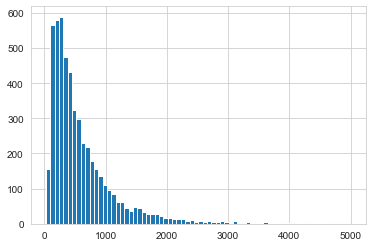

In [12]:
yelpDB['length'].hist(bins=70)

In [177]:
#using describe for the length column in the dataset

In [13]:
yelpDB.length.describe()

count    5262.000000
mean      610.433485
std       585.242673
min        26.000000
25%       242.000000
50%       424.000000
75%       765.000000
max      4998.000000
Name: length, dtype: float64

In [178]:
# Let us see the longest message

In [14]:
yelpDB['text'][yelpDB['length'] == yelpDB['length'].max()].iloc[0]

'Hey Boo Boo, let\'s go get us a pic-a-nic basket" - Yogi Bear\n\nMost people come to Las Vegas for a quick getaway, but where do LV-locals go for a short escape? We love dining at Mount Charleston Lodge, located at the summit of Kyle Canyon: It\'s about a 40 minute scenic cruise on our motorcycle from our home in Summerlin, through the desert and up the mountain, reaching high altitude and a whopping 7,717 foot elevation.\n\nThe first time I stepped foot into the lodge, it stole my heart! It\'s a log cabin with all the woodsy styling you would expect: quaint décor, rustic floor to ceiling windows framing the view of the mountains, large 360 degree fire place in the middle of the lodge, and you\'re surrounded by uninterrupted views of Mount Charleston; ponderosa, juniper and aspen pines as far as the eye can see. There are a few vendors that set up tables in front of the lodge selling handmade jewelry and unique crafts such as pottery, bird feeders and boxes decorated and etched with f

In [179]:
# Let us see the shortest message 

In [15]:
yelpDB['text'][yelpDB['length'] == yelpDB['length'].min()].iloc[0]

'Nothing impressive at all.'

In [ ]:
#Let us see the length of most useful category message

In [16]:
yelpDB['useful'][yelpDB['useful'] == yelpDB['useful'].max()].iloc[0]

83

In [ ]:
#Let us see the most useful category message

In [17]:
yelpDB['text'][yelpDB['useful'] == yelpDB['useful'].max()].iloc[0]

'Don\'t join this service. And if you decide to use their "One on One" training, think again. It ruined my financially. The contract is extremely one sided and literally destroyed me financially. Mike Ferry is the devil and doesn\'t really care about his clients. He would stab them all if he knew he could gain 1 penny from them. \n\nIt\'s a lie and a hoax. Don\'t drink the punch. You will end up losing. \n\nThat is why he makes you sign a 1year agreement. He just wants your money and doesn\'t care about your success.'

In [ ]:
#Let us see the length of most funny category message

In [18]:
yelpDB['funny'][yelpDB['funny'] == yelpDB['funny'].max()].iloc[0]

70

In [ ]:
#Let us see the most funny category message

In [19]:
yelpDB['text'][yelpDB['funny'] == yelpDB['funny'].max()].iloc[0]

'This dentist is great! He not only found a mistake that another dentist made on a crown that was done wrong he helped advise me on what to do. I will definitely be back to see him. The whole office was very nice right down to the front desk staff.'

In [ ]:
#Let us see the length of most cool category message

In [20]:
yelpDB['cool'][yelpDB['cool'] == yelpDB['cool'].max()].iloc[0]

75

In [ ]:
#Let us see the length most cool category message

In [21]:
yelpDB['text'][yelpDB['cool'] == yelpDB['cool'].max()].iloc[0]

'Hey Boo Boo, let\'s go get us a pic-a-nic basket" - Yogi Bear\n\nMost people come to Las Vegas for a quick getaway, but where do LV-locals go for a short escape? We love dining at Mount Charleston Lodge, located at the summit of Kyle Canyon: It\'s about a 40 minute scenic cruise on our motorcycle from our home in Summerlin, through the desert and up the mountain, reaching high altitude and a whopping 7,717 foot elevation.\n\nThe first time I stepped foot into the lodge, it stole my heart! It\'s a log cabin with all the woodsy styling you would expect: quaint décor, rustic floor to ceiling windows framing the view of the mountains, large 360 degree fire place in the middle of the lodge, and you\'re surrounded by uninterrupted views of Mount Charleston; ponderosa, juniper and aspen pines as far as the eye can see. There are a few vendors that set up tables in front of the lodge selling handmade jewelry and unique crafts such as pottery, bird feeders and boxes decorated and etched with f

In [ ]:
#using sns to plot a countplot for the star from 1-5

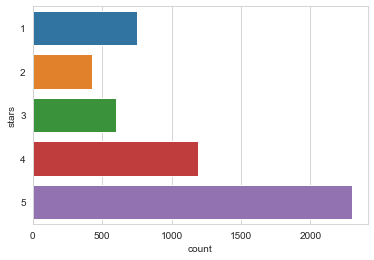

In [22]:
sns.countplot(y = 'stars', data=yelpDB)

In [180]:
#FacetGrid maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset
#Here we plot FacetGrid for the different ratings from 1-5

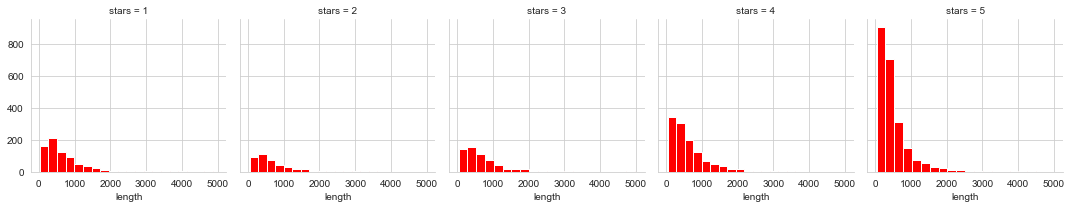

In [23]:
g = sns.FacetGrid(data=yelpDB, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [24]:
# Let us divide the reviews into 1 and 5 stars

In [25]:
yelpDB1 = yelpDB[yelpDB['stars']==1]

In [26]:
yelpDB5 = yelpDB[yelpDB['stars']==5]

In [27]:
yelpDB1.head()

,stars,date,text,useful,funny,cool,length
3786156,1,2016-09-10,I took my wife and two kids here for breakfast...,2,0,0,2493
3012706,1,2014-07-01,Expensive. Smoothies are okay. Salad was dry w...,1,0,1,219
3972665,1,2016-12-30,First American Home Warranty sent out L&S to f...,4,0,0,2682
4812506,1,2015-09-05,This place is utterly disturbing. The fact tha...,1,0,0,287
4650442,1,2016-11-20,11\/20\/16 @3:17am - just went through the dri...,3,1,0,614


In [28]:
yelpDB5.head()

,stars,date,text,useful,funny,cool,length
5098368,5,2016-02-17,This spot is a place I crave so much I will dr...,0,0,0,1186
2545798,5,2015-07-13,Dr. Scholes and his team are amazing! So glad ...,2,0,0,316
3074053,5,2015-07-04,this place is great!!!! Great I tell you. Came...,0,0,0,490
1931801,5,2016-12-24,We stopped in this week for dinner and had a g...,3,2,3,556
384175,5,2017-05-20,Brew Tea is always solid for a to-go boba drin...,1,0,0,771


In [ ]:
#For comparing the difference between reviews of 1- star and 5- star we concat the data of them and will perform operaions on it

In [29]:
yelpDB1_5 = pd.concat([yelpDB1 , yelpDB5])

In [30]:
yelpDB1_5.head()

,stars,date,text,useful,funny,cool,length
3786156,1,2016-09-10,I took my wife and two kids here for breakfast...,2,0,0,2493
3012706,1,2014-07-01,Expensive. Smoothies are okay. Salad was dry w...,1,0,1,219
3972665,1,2016-12-30,First American Home Warranty sent out L&S to f...,4,0,0,2682
4812506,1,2015-09-05,This place is utterly disturbing. The fact tha...,1,0,0,287
4650442,1,2016-11-20,11\/20\/16 @3:17am - just went through the dri...,3,1,0,614


In [ ]:
#reset_index() is used to reset the indexes of the dataset due to which is comes in ascending order

In [31]:
yelpDB1_5 = yelpDB1_5.reset_index()

In [32]:
yelpDB1_5.head()

,index,stars,date,text,useful,funny,cool,length
0,3786156,1,2016-09-10,I took my wife and two kids here for breakfast...,2,0,0,2493
1,3012706,1,2014-07-01,Expensive. Smoothies are okay. Salad was dry w...,1,0,1,219
2,3972665,1,2016-12-30,First American Home Warranty sent out L&S to f...,4,0,0,2682
3,4812506,1,2015-09-05,This place is utterly disturbing. The fact tha...,1,0,0,287
4,4650442,1,2016-11-20,11\/20\/16 @3:17am - just went through the dri...,3,1,0,614


In [33]:
yelpDB1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 3786156 to 882008
Data columns (total 7 columns):
stars     3048 non-null int64
date      3048 non-null object
text      3048 non-null object
useful    3048 non-null int64
funny     3048 non-null int64
cool      3048 non-null int64
length    3048 non-null int64
dtypes: int64(5), object(2)
memory usage: 190.5+ KB


In [ ]:
yelpDB1_5.drop(['index'],axis=1,inplace=True)

In [34]:
print( '1-Stars percentage =', (len(yelpDB1) / len(yelpDB1_5) )*100,"%")

1-Stars percentage = 24.639107611548557 %


In [35]:
print( '5-Stars percentage =', (len(yelpDB5) / len(yelpDB1_5) )*100,"%")

5-Stars percentage = 75.36089238845143 %


In [ ]:
#countplot to show the difference between 1 and 5 star reviews

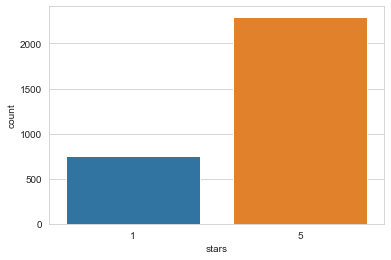

In [36]:
sns.countplot(yelpDB1_5['stars'], label = "Count") 

In [ ]:
yelpDBreset1 = yelpDB1_5

# STEP #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 4.1 EXERCISE: REMOVE PUNCTUATION

In [ ]:
#printing the punctuations from string

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#creating a test variable

In [38]:
Test = "Hello, I am Japjeet Singh + I am Ritu Kalsy ^_^" 
print(Test)

Hello, I am Japjeet Singh + I am Ritu Kalsy ^_^


In [ ]:
#for every word in the test variable's string, remove the punctuation

In [39]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'J',
 'a',
 'p',
 'j',
 'e',
 'e',
 't',
 ' ',
 'S',
 'i',
 'n',
 'g',
 'h',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'R',
 'i',
 't',
 'u',
 ' ',
 'K',
 'a',
 'l',
 's',
 'y',
 ' ']

In [ ]:
# Join the characters again to form the string

In [40]:
Test_punc_removed_join = ''.join(Test_punc_removed)
print(Test_punc_removed_join)

Hello I am Japjeet Singh  I am Ritu Kalsy 


In [ ]:
#use .lower() to convert them to lower cases

In [41]:
Test_punc_removed_join_lower = Test_punc_removed_join.lower()
print(Test_punc_removed_join_lower)

hello i am japjeet singh  i am ritu kalsy 


# STEP 4.2 EXERCISE: REMOVE STOPWORDS

In [ ]:
#The Natural Language Toolkit (NLTK) is a platform used for processing libraries for tokenization, parsing, classification and others
#The nltk.corpus package automatically creates a set of corpus reader instances that can be used to access the corpora in the NLTK data package.
#Download stopwords Package to execute this command

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
print(Test_punc_removed_join_lower)

hello i am japjeet singh  i am ritu kalsy 


In [ ]:
#remove the stopwords for all the words present in the results we found earlier

In [44]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join_lower.split() if word not in stopwords.words('english')]

In [ ]:
#Only important (no so common) words are left

In [45]:
Test_punc_removed_join_clean 

['hello', 'japjeet', 'singh', 'ritu', 'kalsy']

# STEP 4.3 EXERCISE: COUNT VECTORIZER EXAMPLE 

In [ ]:
#sklearn.feature_extraction module can be used to extract features from datasets consisting of formats such as text and image.
#CountVectorizer is used to convert a collection of text documents to a matrix of token counts
#fit_transform() is used for the initial fitting of parameters, but it also returns a transformed dataset.

In [46]:
trialdata = ['this is japjeet singh','that is ritu kalsy','japjeet loves food','ritu loves painting',
             'that painting is a food painting?']

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
td = vectorizer.fit_transform(trialdata)

In [ ]:
#get_feature_names() is used for array mapping from feature integer indices to feature name

In [48]:
print(vectorizer.get_feature_names())
print(td.toarray())  

['food', 'is', 'japjeet', 'kalsy', 'loves', 'painting', 'ritu', 'singh', 'that', 'this']
[[0 1 1 0 0 0 0 1 0 1]
 [0 1 0 1 0 0 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [1 1 0 0 0 2 0 0 1 0]]


# LET'S APPLY THE PREVIOUS THREE PROCESSES TO OUR YELP REVIEWS EXAMPLE

### Let's define a pipeline to clean up all the messages 
### The pipeline performs the following: 
 - Remove punctuation
 - Remove stopwords


In [49]:
def cleaning_process(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

### Let's test the newly added function

In [50]:
yelpDBcleantry1 = yelpDBreset1['text'].apply(cleaning_process)

In [51]:
yelpDBcleantry1.head()

0    [took, wife, two, kids, breakfast, Saturday, m...
1    [Expensive, Smoothies, okay, Salad, dry, ingre...
2    [First, American, Home, Warranty, sent, LS, fi...
3    [place, utterly, disturbing, fact, paid, almos...
4    [112016, 317am, went, drive, thru, 3rd, car, l...
Name: text, dtype: object

In [ ]:
#result after performing pipeline

In [52]:
print(yelpDBcleantry1[1])

['Expensive', 'Smoothies', 'okay', 'Salad', 'dry', 'ingredients', 'dressing', 'mostly', 'eating', 'dry', 'leaves', 'asked', 'dressing', 'tried', 'charge', 'extra', 'Ridiculous', 'moneygrabbing', 'company']


In [ ]:
#show the original version

In [53]:
yelpDBreset1['text'].iloc[1] 

'Expensive. Smoothies are okay. Salad was dry with very few ingredients. No dressing at all, so I was mostly eating dry leaves. When I asked for dressing they tried to charge me extra. Ridiculous, money-grabbing company.'

# LET'S APPLY COUNT VECTORIZER TO OUR YELP REVIEWS EXAMPLE

In [ ]:
# Define the cleaning pipeline we defined earlier

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = cleaning_process)
yelp_countvectorizer = vectorizer.fit_transform(yelpDB1_5['text'])

In [57]:
print(vectorizer.get_feature_names())


['0', '01', '042817', '0531', '0631', '0701', '072006', '072816', '08', '09', '0stars', '1', '10', '100', '1000', '10000', '100ig', '100pm', '100th', '101', '1010', '1015', '1015am', '102', '102411', '103012', '1030am', '1030pm', '1035', '1040', '105', '1050', '1079', '10895', '109', '1095', '10PM', '10X', '10am', '10ish', '10pm', '10th', '10xx', '11', '110', '1100', '1100am700pm', '1105', '1106', '1111000000', '1115', '112016', '1122AM', '1128', '1130', '1130am', '1130pm', '1144', '1145', '115', '11517', '115pm', '1193', '11am', '11pm', '11th', '12', '120', '1200', '120000', '12015', '1210', '1215', '1215pm', '1218', '1230', '12301245', '123016', '1230pm', '1244mo', '1245', '1245pm', '125', '1250', '125am', '1280', '129', '1299', '12am', '12oz', '12pm', '12pm2pm', '12th', '12xweek', '12year', '13', '130', '1300', '134', '13s', '13th', '14', '1400', '14051', '145', '1473', '15', '150', '15000', '1512', '1520', '1524mo', '1550', '159', '15mins', '15minsso', '15yrs', '16', '160', '1600',

In [58]:
print(yelp_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [59]:
yelp_countvectorizer.shape

(3048, 20180)

# STEP#5: TRAINING THE MODEL WITH ALL DATASET

In [ ]:
#Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. 
#The multinomial Naive Bayes classifier is suitable for classification with discrete features.

In [60]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelpDB1_5['stars'].values

In [61]:
label

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [62]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
testing_sample = ['amazing food! highly recommmended']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)

array([5], dtype=int64)

In [64]:
testing_sample = ['shit food, made me sick']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1], dtype=int64)

# STEP#6: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [65]:
X = yelp_countvectorizer
y = label

In [66]:
X.shape

(3048, 20180)

In [67]:
y.shape

(3048,)

In [ ]:
#We split arrayas or matrices into random train and test subsets
#train_size is of 0.2 which means 80% is training data and 20% is testing data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# STEP#7: EVALUATING THE MODEL 

In [185]:
#The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance.
#classification_report- Build a text report showing the main classification metrics
#confusion_matrix- Compute confusion matrix to evaluate the accuracy of a classification

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Train set results

In [186]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
cm

array([[  55,  468],
       [   0, 1610]], dtype=int64)

In [ ]:
# Predicting the Test set results

In [187]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[  4, 224],
       [  0, 687]], dtype=int64)

In [ ]:
# Predicting the classification report

In [74]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.86      0.81      0.84       162
           5       0.93      0.95      0.94       448

    accuracy                           0.92       610
   macro avg       0.90      0.88      0.89       610
weighted avg       0.92      0.92      0.92       610



# STEP #8: LET'S ADD WORD CLOUD

In [85]:
yelp_df_cleantry1.shape[0]

3048

In [ ]:
#Combining all the data we get after performing the clean_message process

In [118]:
textcombine = ""
for i in range(yelp_df_cleantry1.shape[0]):
    textjoin = " ".join(yelp_df_cleantry1[i])
    textcombine += " " + textjoin
    
finaltext = textcombine.lower()

In [ ]:
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
#Image module providesa number of factory functions, including functions to load images from files, and to create new images.
#The OS module in Python provides a way of using operating system dependent functionality.


In [107]:
from wordcloud import WordCloud
from PIL import Image
import os

In [ ]:
#Returns a normalized absolutized version of the pathname path

In [102]:
currdir = os.path.abspath('')
currdir

'C:\\Users\\japma\\Documents\\Algo Project'

In [ ]:
#Take an image frame from the current directory
#From the WordCloud function use the max_words, background_color and mask the image frame from previous step
#Generate the word cloud
#Store he word cloud in new image

In [116]:
def create_wc(text):
    mask = np.array(Image.open(os.path.join(currdir, "cloud.png")))
    wc = WordCloud(background_color='white',max_words=500,mask=mask)
    wc.generate(text)
    wc.to_file(os.path.join(currdir,"wc.png"))

In [ ]:
#Create the wordcloud with the assigned data

In [117]:
create_wc(finaltext)

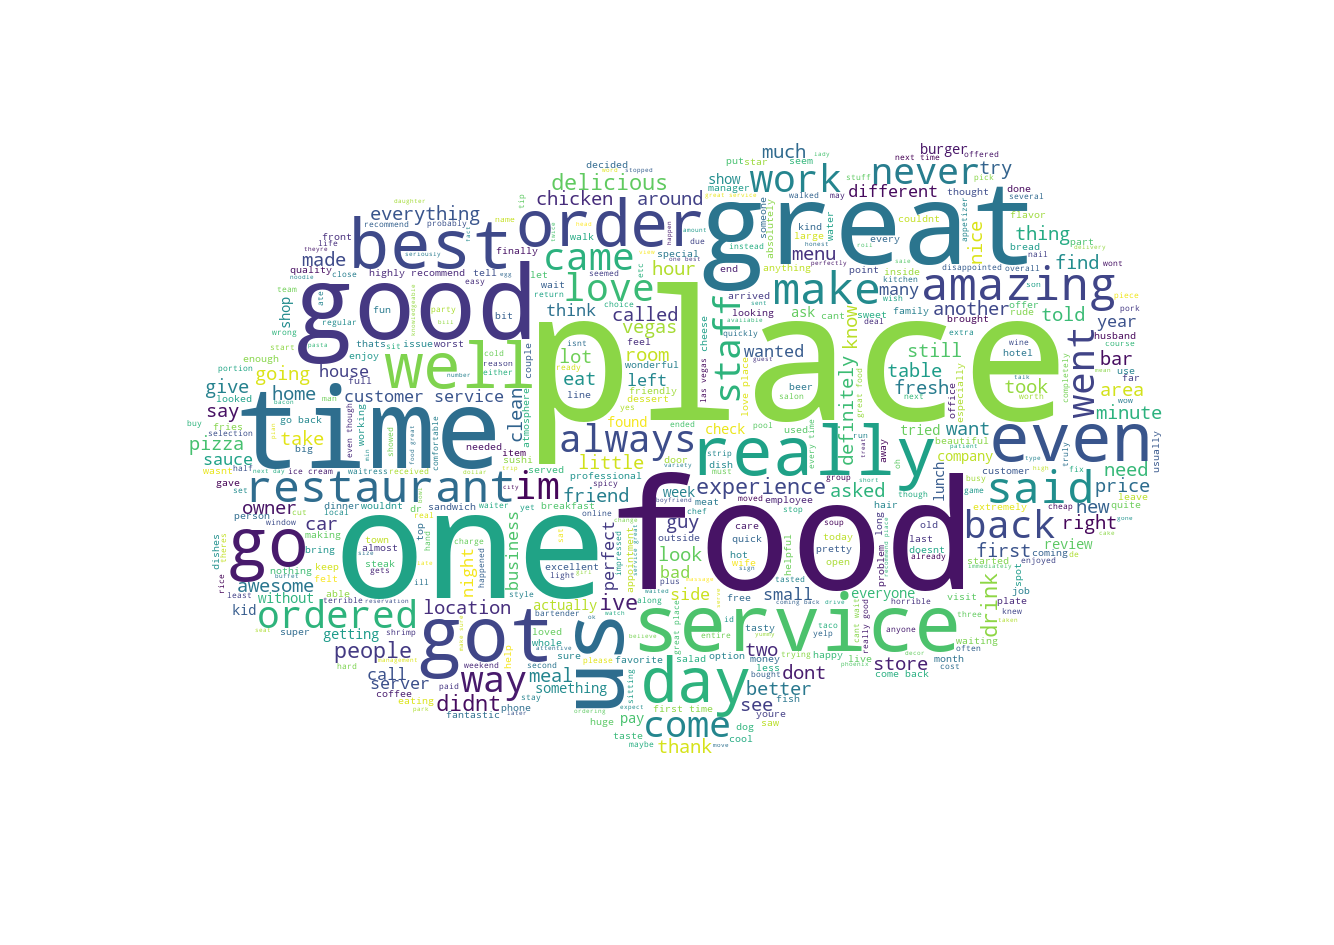